# Win Prediction from Team's Stats at 10-min Mark


This notebook investigate '10mins_stats.csv' file to find analyze various factors/objectives at 10-min timestamp which contribute to the team's success. The csv file consists of team's overall stats such as team kills, team total gold, etc., and the label whether the time managed to end the game with a win or loss.
## 1. Data Exploration

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
df = pd.read_csv('10mins_stats.csv')
df.head()

,matchId,blue_wins,blue_kills,blue_assists,blue_deaths,blue_wards_placed,blue_wards_kills,blue_dragon_kills,blue_herald_kills,blue_tower_kills,...,red_wards_placed,red_wards_kills,red_dragon_kills,red_herald_kills,red_tower_kills,red_inhibitor_kills,red_total_gold,red_average_lvl,red_total_exp,red_total_cs
0,NA1_4134639110,False,11,16,15,17,5,1,0,0,...,17,7,0,0,0,0,21912,7.6,21428,302
1,NA1_4135794736,False,3,4,16,18,4,0,1,0,...,17,4,1,0,0,0,22520,8.0,22244,341
2,NA1_4136156707,False,6,5,11,20,3,0,0,0,...,20,2,1,0,0,0,20789,7.6,21383,304
3,NA1_4136537752,True,16,16,14,13,3,0,0,0,...,17,2,0,1,0,0,21596,7.8,21039,282
4,NA1_4137045009,True,12,14,8,16,2,1,0,0,...,13,0,0,0,0,0,18154,7.2,19753,290


<AxesSubplot:xlabel='blue_wins'>

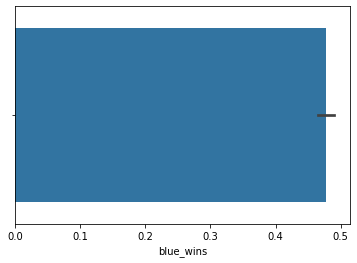

In [3]:
sns.barplot(data=df, x='')

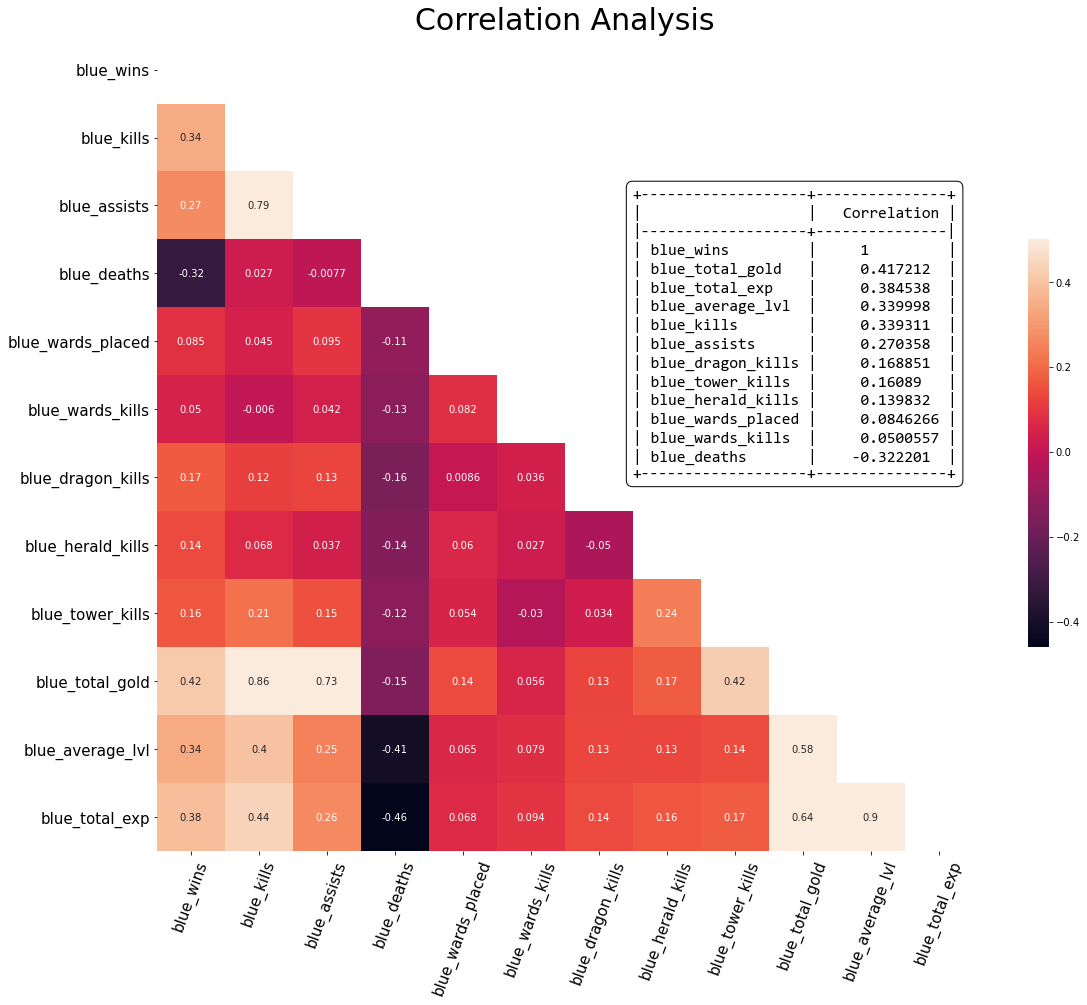

In [8]:
corr = df[df.columns[:14]].drop(['blue_inhibitor_kills'], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(20,15))
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=None, vmax=0.5, square=True, annot=True, cbar_kws={'shrink':.5}, ax=ax)
ax.tick_params(axis='x', rotation=70, labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('Correlation Analysis', fontsize=30)

text = tabulate(corr['blue_wins'].sort_values(ascending=False).rename('Correlation').to_frame(),
                headers='keys',
                tablefmt='psql'
               )
plt.text(7, 6.5, text,
         fontsize=16,
         bbox=dict(boxstyle="round, pad=0.4", fc="white", ec="black", lw=1),
         **{'fontname':'Consolas'}
         
        )

plt.show()